<a href="https://colab.research.google.com/github/conglapgit45/Image_Retrieval/blob/main/Image_Retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Download and unzip data file

In [3]:
!gdown '1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF&fbclid'
!unzip -q '/content/data.zip'

Downloading...
From (original): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF&fbclid
From (redirected): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF&confirm=t&uuid=44dfee3b-8348-4765-a492-69e8e218dcc9
To: /content/data.zip
100% 76.1M/76.1M [00:00<00:00, 79.9MB/s]


# Some initiations

In [4]:
ROOT = '/content/data'
CLASS_NAME = sorted(list(os.listdir(f'{ROOT}/train')))

In [5]:
def read_image_from_path(path, size):
    im = Image.open(path).convert('RGB').resize(size)
    return np.array(im)

def folder_to_images(folder, size):
    list_dir = [folder + '/' + name for name in os.listdir(folder)]
    images_np = np.zeros(shape=(len(list_dir), *size, 3))
    images_path = []
    for i, path in enumerate(list_dir):
        images_np[i] = read_image_from_path(path, size)
        images_path.append(path)
    images_path = np.array(images_path)
    return images_np, images_path

def plot_results(query_path, ls_path_score, reverse):
    topK = 5
    query_image = Image.open(query_path)
    plt.figure(figsize=(3, 3), dpi=32)
    plt.imshow(query_image)
    print('Query Image:')
    plt.show()
    ls_path_score.sort(reverse=reverse, key = lambda x: x[1])
    print('Top 5 images most similar to the Query Image:')
    fig = plt.figure(figsize=(9, 9), dpi=64)
    for i, x in enumerate(ls_path_score[:topK]):
        image = Image.open(x[0])
        fig.add_subplot(1, topK, i + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# Query with L1 measure

In [6]:
def absolute_difference(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    return np.sum(np.abs(data - query), axis=axis_batch_size)

In [7]:
def get_l1_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = absolute_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

Query Image:


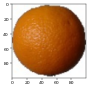

Top 5 images most similar to the Query Image:


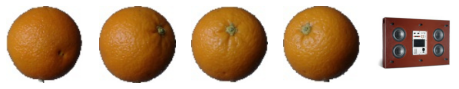

In [7]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

Query Image:


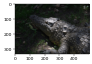

Top 5 images most similar to the Query Image:


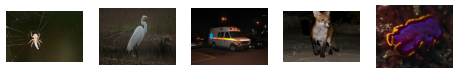

In [8]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

# Query with L2 measure

In [8]:
def mean_square_difference(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    return np.mean((data - query)**2, axis=axis_batch_size)

In [9]:
def get_l2_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = mean_square_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

Query Image:


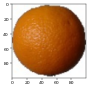

Top 5 images most similar to the Query Image:


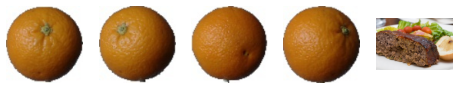

In [11]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

Query Image:


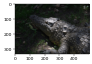

Top 5 images most similar to the Query Image:


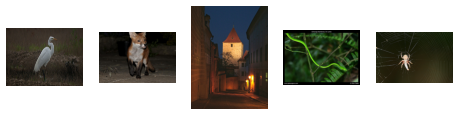

In [12]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

# Query with Cosine Similarity measure

In [10]:
def cosine_similarity(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    query_norm = np.sqrt(np.sum(query**2))
    data_norm = np.sqrt(np.sum(data**2, axis=axis_batch_size))
    return np.sum(data * query, axis=axis_batch_size) / (query_norm*data_norm + np.finfo(float).eps)

In [11]:
def get_cosine_similarity_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = cosine_similarity(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

Query Image:


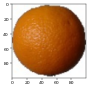

Top 5 images most similar to the Query Image:


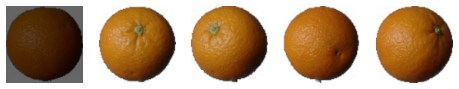

In [15]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

Query Image:


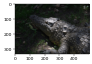

Top 5 images most similar to the Query Image:


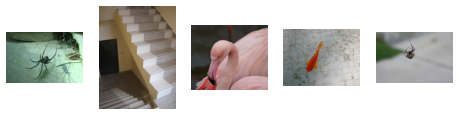

In [16]:
root_img_path =f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

# Query with Correlation Coefficient measure

In [12]:
def correlation_coefficient(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    query_mean = query - np.mean(query)
    data_mean = data - np.mean(data, axis=axis_batch_size, keepdims=True)
    query_norm = np.sqrt(np.sum(query_mean**2))
    data_norm = np.sqrt(np.sum(data_mean**2, axis=axis_batch_size))
    return np.sum(data_mean * query_mean, axis=axis_batch_size) / (query_norm*data_norm + np.finfo(float).eps)

In [13]:
def get_correlation_coefficient_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = correlation_coefficient(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

Query Image:


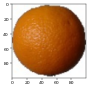

Top 5 images most similar to the Query Image:


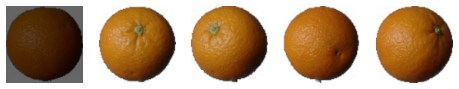

In [19]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

Query Image:


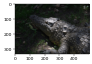

Top 5 images most similar to the Query Image:


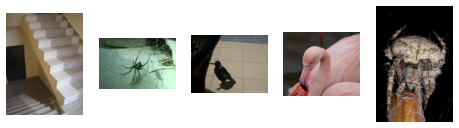

In [20]:
root_img_path =f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

# Query with pretrained deep learning model

In [14]:
!pip install chromadb
!pip install open-clip-torch
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 92.3 MB/s eta 0:00:00


In [15]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
import tqdm

In [16]:
# Initializes a function to extract feature vectors from an image using the CLIP model
embedding_function = OpenCLIPEmbeddingFunction()

# get_single_image_embedding get an image as input and use _encode_image method of OpenCLIPEmbeddingFunction to extract feature vectors of the image
def get_single_image_embedding(image):
    embedding = embedding_function._encode_image(image=image)
    return np.array(embedding)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [17]:
# Query embedding vector with L1 measure
# get_l1_score function is improved by CLIP model to extract feature vector
def get_l1_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    query_embedding = get_single_image_embedding(query)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            embedding_list = []
            for idx_img in range(images_np.shape[0]):
                embedding = get_single_image_embedding(images_np[idx_img].astype(np.uint8))
                embedding_list.append(embedding)
            rates = absolute_difference(query_embedding, np.stack(embedding_list))
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

In [18]:
# Query embedding vector with L1 measure
# get_l2_score function is improved by CLIP model to extract feature vector
def get_l2_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    query_embedding = get_single_image_embedding(query)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            embedding_list = []
            for idx_img in range(images_np.shape[0]):
                embedding = get_single_image_embedding(images_np[idx_img].astype(np.uint8))
                embedding_list.append(embedding)
            rates = mean_square_difference(query_embedding, np.stack(embedding_list))
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

In [19]:
# Query embedding vector with L1 measure
# get_cosine_similarity_score function is improved by CLIP model to extract feature vector
def get_cosine_similarity_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    query_embedding = get_single_image_embedding(query)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            embedding_list = []
            for idx_img in range(images_np.shape[0]):
                embedding = get_single_image_embedding(images_np[idx_img].astype(np.uint8))
                embedding_list.append(embedding)
            rates = cosine_similarity(query_embedding, np.stack(embedding_list))
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

In [20]:
# Query embedding vector with L1 measure
# get_correlation_coefficient_score function is improved by CLIP model to extract feature vector
def get_correlation_coefficient_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    query_embedding = get_single_image_embedding(query)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            embedding_list = []
            for idx_img in range(images_np.shape[0]):
                embedding = get_single_image_embedding(images_np[idx_img].astype(np.uint8))
                embedding_list.append(embedding)
            rates = correlation_coefficient(query_embedding, np.stack(embedding_list))
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

Query Image:


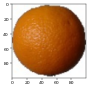

Top 5 images most similar to the Query Image:


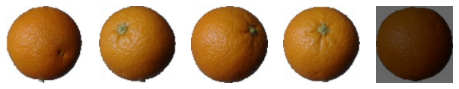

Query Image:


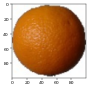

Top 5 images most similar to the Query Image:


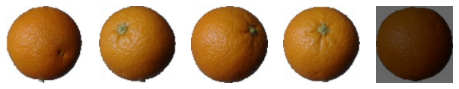

Query Image:


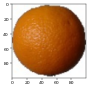

Top 5 images most similar to the Query Image:


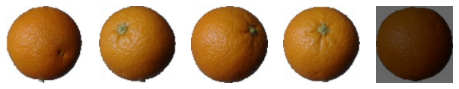

Query Image:


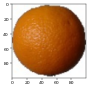

Top 5 images most similar to the Query Image:


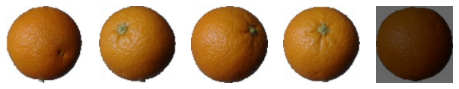

In [28]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)

query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

Query Image:


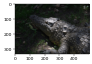

Top 5 images most similar to the Query Image:


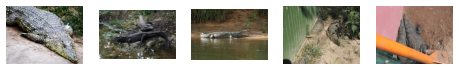

Query Image:


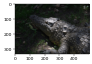

Top 5 images most similar to the Query Image:


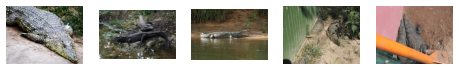

Query Image:


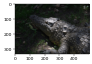

Top 5 images most similar to the Query Image:


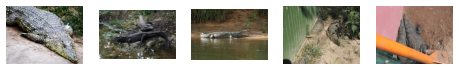

Query Image:


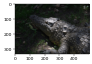

Top 5 images most similar to the Query Image:


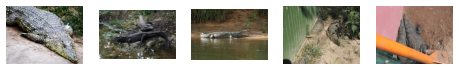

In [34]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)

query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

# Optimaize image query using CLIP model and vector database

In [21]:
# List subfolders based on the class names (CLASS_NAME).
# Then, list all the images in each subfolder and store the path of each image in a list.
def get_files_path(path):
    files_path = []
    for label in CLASS_NAME:
        label_path = path + "/" + label
        filenames = os.listdir(label_path)
        for filename in filenames:
            filepath = label_path + '/' + filename
            files_path.append(filepath)
    return files_path

data_path = f'{ROOT}/train'
files_path = get_files_path(path=data_path)

In [22]:
# Initializes add_embeddingfunction for extract and store feature vector of the image to a collection
def add_embedding(collection, files_path):
    ids = []
    embeddings = []
    for id_filepath, filepath in tqdm.tqdm(enumerate(files_path)):
        ids.append(f'id_{id_filepath}')
        image = Image.open(filepath)
        image_np = np.array(image) # Convert the image to a NumPy array before passing it to get_single_image_embedding
        embedding = get_single_image_embedding(image=image_np) # Pass the NumPy array
        embeddings.append(embedding.tolist()) # Convert the NumPy array to a list before appending
    collection.add(
        embeddings=embeddings,
        ids=ids
    )

In [23]:
# Create a Chroma Client
chroma_client = chromadb.Client()

# Create a collection
l2_collection = chroma_client.get_or_create_collection(name="l2_collection", metadata={'HNSW_SPACE': "l2"})

#Add feature vector to collection
add_embedding(collection=l2_collection, files_path=files_path)

595it [02:24,  4.10it/s]


In [24]:
# search function for query images based on embedding of the image
def search(image_path, collection, n_results):
    query_image = Image.open(image_path)
    query_image_np = np.array(query_image) # Convert to numpy array
    query_embedding = get_single_image_embedding(query_image_np) # Pass the NumPy array to get_single_image_embedding
    results = collection.query(
        query_embeddings=[query_embedding.tolist()], # Convert the NumPy array to a list of lists
        n_results=n_results # how many results to return
    )
    return results

In [25]:
# Define plot_results_02 function for visualize result
def plot_results_02(image_path, files_path, results):
    query_image = Image.open(image_path)
    plt.figure(figsize=(3, 3), dpi=32)
    plt.imshow(query_image)
    print('Query Image:')
    plt.show()
    print('Top 5 images most similar to the Query Image:')
    fig = plt.figure(figsize=(9, 9), dpi=64)
    for i, x in enumerate(results['ids'][0]):
        ind = int(x[3:])
        image = Image.open(files_path[ind])
        fig.add_subplot(1, len(results['ids'][0]), i + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

Query Image:


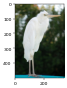

Top 5 images most similar to the Query Image:


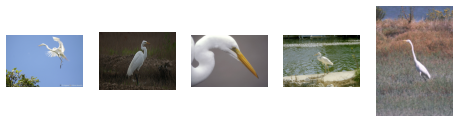

In [26]:
test_path = f'{ROOT}/test'
test_files_path = get_files_path(path=test_path)
test_path = test_files_path[1]
l2_results = search(image_path=test_path, collection=l2_collection, n_results=5)
plot_results_02(image_path=test_path, files_path=files_path, results=l2_results)

In [27]:
# Create a collection with cosine
cosine_collection = chroma_client.get_or_create_collection(name="Cosine_collection", metadata={'HNSW_SPACE': "cosine"})
add_embedding(collection=cosine_collection, files_path=files_path)

595it [02:31,  3.94it/s]


Query Image:


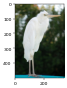

Top 5 images most similar to the Query Image:


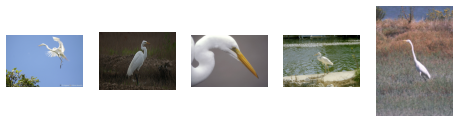

In [28]:
test_path = f'{ROOT}/test'
test_files_path = get_files_path(path=test_path)
test_path = test_files_path[1]
cosine_results = search(image_path=test_path, collection=cosine_collection, n_results=5)
plot_results_02(image_path=test_path, files_path=files_path, results=cosine_results)